In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import tensorflow as tf
tf.__version__

'2.3.1'

In [139]:
np.random.seed(10)
tf.compat.v1.set_random_seed(10)

In [140]:
# Cargo los csv
df_global = pd.read_csv("./unified-lightcurves-global.csv").iloc[:, 1:]

display(df_global)

,kepid,kepler_name,kepoi_name,koi_disposition,light_flux_0001,light_flux_0002,light_flux_0003,light_flux_0004,light_flux_0005,light_flux_0006,...,light_flux_0992,light_flux_0993,light_flux_0994,light_flux_0995,light_flux_0996,light_flux_0997,light_flux_0998,light_flux_0999,light_flux_1000,light_flux_1001
0,10797460.0,Kepler-227 b,K00752.01,1,0.832189,0.435614,1.357075,1.108348,1.650665,1.129287,...,0.713763,1.274681,1.154911,2.088258,1.059249,0.848340,1.142176,0.961584,0.966640,1.044353
1,10811496.0,NaN,K00753.01,0,0.966682,0.964235,0.970539,0.937743,0.975104,1.039065,...,0.943850,0.965717,0.990491,0.982717,0.985906,0.961670,1.043547,0.983126,1.040699,1.040926
2,10848459.0,NaN,K00754.01,0,1.034104,0.982172,1.048199,1.078219,0.983764,0.992431,...,0.946015,1.010975,1.011789,1.055202,1.038121,1.044473,1.071489,1.053268,1.033189,1.005258
3,10854555.0,Kepler-664 b,K00755.01,1,0.975071,1.225692,1.269809,1.771289,1.312162,1.097620,...,1.335065,1.179038,1.002768,1.017255,0.823422,0.561212,1.035374,0.835232,1.615619,1.464552
4,10872983.0,Kepler-228 d,K00756.01,1,1.394998,1.185855,0.932441,1.230771,0.940595,0.909058,...,0.864800,0.850251,1.086740,1.073562,0.930443,0.857681,1.232381,1.297968,1.208948,1.079670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,10031643.0,NaN,K07984.01,0,0.175475,1.504283,1.318089,0.769620,0.666730,1.008246,...,1.378201,1.927068,1.984925,1.130322,1.202864,0.781321,0.045358,0.647927,1.207362,1.101768
6091,10090151.0,NaN,K07985.01,0,0.747230,0.915918,1.031489,0.989710,1.021699,0.867820,...,0.755320,0.876177,0.913214,0.960485,1.017231,0.789195,0.809078,0.774575,0.872496,0.802597
6092,10128825.0,NaN,K07986.01,0,0.714833,1.610737,0.196081,0.533665,1.053996,0.873009,...,1.082519,1.101279,1.060959,1.446257,1.603752,0.875442,1.295145,1.852598,0.230911,0.803615
6093,10147276.0,NaN,K07987.01,0,1.486451,1.733356,0.993478,0.776943,0.226574,0.407813,...,0.898611,1.483079,1.160034,0.921238,1.509204,-0.560163,0.666612,1.113881,2.175872,2.393636


In [141]:
global_fluxes = df_global.iloc[:,4:]
global_labels = df_global.iloc[:,3]

## Particionado de datos

In [142]:
x_global_train, x_global_test, y_global_train, y_global_test = train_test_split(
    global_fluxes, global_labels, test_size=0.3, random_state=11)

In [143]:
print(x_global_train.shape, x_global_test.shape, y_global_train.shape, y_global_test.shape)

(4266, 1001) (1829, 1001) (4266,) (1829,)


In [144]:
#Definimos las dimensiones
n_outputs = 1
n_global_timesteps, n_global_features  = x_global_train.shape[0], x_global_train.shape[1]

In [145]:
print(n_global_timesteps, n_global_features)

4266 1001


In [146]:
#Expandimos las dimensiones de train 
x_global_extended_train = np.expand_dims(x_global_train,axis=-1)
y_global_extended_train = np.array(y_global_train)

In [147]:
print(x_global_train.shape, y_global_train.shape)
print(x_global_extended_train.shape, y_global_extended_train.shape)

(4266, 1001) (4266,)
(4266, 1001, 1) (4266,)


In [148]:
#Expandimos las dimensiones de test
x_global_extended_test = np.expand_dims(x_global_test,axis=-1)
y_global_extended_test = np.array(y_global_test)

In [149]:
print(x_global_test.shape, y_global_test.shape)
print(x_global_extended_test.shape, y_global_extended_test.shape)

(1829, 1001) (1829,)
(1829, 1001, 1) (1829,)


## Construcción Red Neuronal

In [150]:
inputGlobalView = tf.keras.layers.Input(shape=(n_global_features, 1))
inputGlobalView.set_shape([n_global_timesteps, n_global_features, 1])  # 4266 x 1001


CG1 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(inputGlobalView)
CG2 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(CG1)

MG1 = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2)(CG2)

CG3 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(MG1)
CG4 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(CG3)

MG2 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG4)

CG5 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')(MG2)
CG6 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')(CG5)

MG3 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG6)

CG7 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')(MG3)
CG8 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')(CG7)

MG4 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG8)

CG9 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')(MG4)
CG10 = tf.keras.layers.Conv1D(filters=256, kernel_size=5, activation='relu')(CG9)

MG5 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG10)

flat2 = tf.keras.layers.Flatten()(MG5)


### Unificación de redes

In [151]:
output_activation = 'relu' # tanh / sigmoid / relu #
output_optimizer = 'adam' # adam / adamax#
rrnn = 'globalv2'

basefolder = "trainings/" + rrnn + "_" + output_activation + "-" + output_optimizer 
basepath = basefolder + "/" + rrnn + "_" + output_activation + "-" + output_optimizer

In [152]:
# merge input models
# merge = tf.keras.layers.concatenate([flat2])

# interpretation model
hidden1 = tf.keras.layers.Dense(256, activation='relu')(flat2)
hidden2 = tf.keras.layers.Dense(256, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(256, activation='relu')(hidden2)
hidden4 = tf.keras.layers.Dense(256, activation='relu')(hidden3)

In [153]:
output = tf.keras.layers.Dense(n_outputs, activation=output_activation)(hidden4)

model = tf.keras.Model(inputs=inputGlobalView, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=output_optimizer, metrics=['accuracy'])

print(model.summary())

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(4266, 1001, 1)]         0         
_________________________________________________________________
conv1d_50 (Conv1D)           (4266, 997, 16)           96        
_________________________________________________________________
conv1d_51 (Conv1D)           (4266, 993, 16)           1296      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (4266, 496, 16)           0         
_________________________________________________________________
conv1d_52 (Conv1D)           (4266, 492, 32)           2592      
_________________________________________________________________
conv1d_53 (Conv1D)           (4266, 488, 32)           5152      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (4266, 244, 32)         

In [154]:
# Establecemos callbacks para guardad los pasos
checkpoint_path = basepath + "-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=0, 
    save_weights_only=True,
    save_freq='epoch'
)

os.makedirs(checkpoint_dir, exist_ok=True)

In [155]:
# checkpoint_path.format(epoch=0)
latest = tf.train.latest_checkpoint(basefolder)
latest

In [156]:
if latest:
    model.load_weights(latest)
else :
    # divisores 4266: 1, 2, 3, 6, 9, 18, 27, 54, 79, 158, 237, 474, 711, 1422, 2133, 4266
    bs = 237
    Ajuste = model.fit(
        x_global_extended_train, 
        y_global_extended_train, 
        epochs=50, 
        batch_size=bs,
        
        # validation_data=(test_images,test_labels),
        callbacks=[cp_callback],
    )

Epoch 1/50
18/18 [==============================] - 13s 722ms/step - loss: 0.6085 - accuracy: 0.7471
Epoch 2/50
18/18 [==============================] - 20s 1s/step - loss: 0.5174 - accuracy: 0.7576
Epoch 3/50
18/18 [==============================] - 20s 1s/step - loss: 0.4689 - accuracy: 0.7759
Epoch 4/50
18/18 [==============================] - 20s 1s/step - loss: 0.4587 - accuracy: 0.8003
Epoch 5/50
18/18 [==============================] - 20s 1s/step - loss: 0.4514 - accuracy: 0.7965
Epoch 6/50
18/18 [==============================] - 20s 1s/step - loss: 0.4136 - accuracy: 0.8195
Epoch 7/50
18/18 [==============================] - 20s 1s/step - loss: 0.4595 - accuracy: 0.8265
Epoch 8/50
18/18 [==============================] - 20s 1s/step - loss: 0.4068 - accuracy: 0.8268
Epoch 9/50
18/18 [==============================] - 20s 1s/step - loss: 0.4084 - accuracy: 0.8263
Epoch 10/50
18/18 [==============================] - 20s 1s/step - loss: 0.3833 - accuracy: 0.8448
Epoch 11/50
18/1

In [157]:
def pintar_matriz_confusion(conf_matx):
    df_cm = pd.DataFrame(conf_matx, index = [i for i in "01"],
                    columns = [i for i in "01"])

    plt.figure(0.5)
    heat_map = sn.heatmap(df_cm, xticklabels=True, yticklabels=True, annot=True, annot_kws = {"ha": 'center'})
    #heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
    plt.xlabel('Predicción')
    plt.ylabel('Real')


def pintar_roc_curve(fp,tp):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label='CNN (area = {:.3f})'.format(area_under_curve))
    plt.scatter(fp[ix], tp[ix], marker='o', color='black', label='Best')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

In [158]:
y_pred_keras_raw = model.predict([x_global_extended_test])
y_pred_keras = y_pred_keras_raw.ravel() # flatten as array

y_pred_keras_standart = (y_pred_keras >= 0.5).astype(np.int)

display(y_pred_keras_raw)
display(y_pred_keras_standart)

array([[1.01153105e-01],
       [5.17738573e-02],
       [8.32314044e-02],
       ...,
       [9.77620929e-02],
       [3.32022160e-02],
       [5.21708280e-05]], dtype=float32)

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
print(basefolder, "\n\n\n\n")

# Exactitud
accuracy = accuracy_score(y_global_extended_test, y_pred_keras_standart)
print("accuracy =", accuracy)

# Precisión
average_precision = average_precision_score(y_global_extended_test, y_pred_keras_standart)
print("average_precision =", average_precision)

# Recall
recall = recall_score(y_global_extended_test, y_pred_keras_standart, average=None)
print("recall =", recall)

# F1
f1 = f1_score(y_global_extended_test, y_pred_keras_standart)
print("f1 =", f1)

trainings/globalv2_relu-adam 




accuracy = 0.764898851831602
average_precision = 0.323993153613473
recall = [0.99115044 0.11627907]
f1 = 0.2037037037037037


Best Threshold=0.126736, G-Mean=0.825
area_under_curve (AUC) =  0.8876717369205536


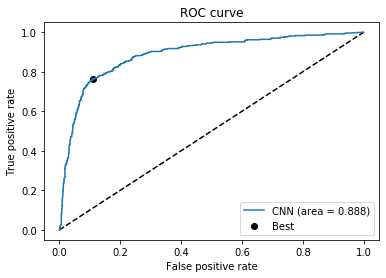

In [160]:
# Defino las métricas
false_positives, true_positives, thresholds = roc_curve(y_global_extended_test, y_pred_keras)
area_under_curve = auc(false_positives, true_positives)
gmeans = np.sqrt(true_positives * (1-false_positives))

# localiza el índice del mayor g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("area_under_curve (AUC) = ", area_under_curve)
pintar_roc_curve(false_positives, true_positives)


conf_matrix =
 [[1344   12]
 [ 418   55]]


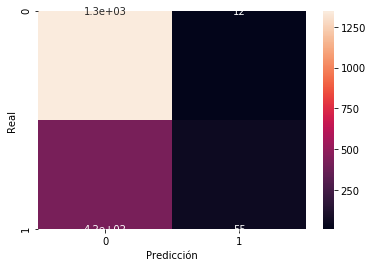

In [161]:
conf_matrix = confusion_matrix(y_global_extended_test, y_pred_keras_standart)
print("conf_matrix =\n", conf_matrix)

pintar_matriz_confusion(conf_matrix)

pd.DataFrame(conf_matrix).to_csv(basepath + '.csv')

In [162]:
#Umbral estándar
PhiM_Standart = matthews_corrcoef(y_global_extended_test, y_pred_keras_standart)
print("PhiM_Standart =", PhiM_Standart)

PhiM_Standart = 0.2504053858578158
